In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.fft import fft, fftfreq
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [20, 6]

SAMPLE_RATE = 44000
DURATION = 1

In [3]:
def create_t(duration, sample_rate):
    return np.linspace(0, duration, sample_rate * duration, endpoint=False)

def create_sin(x, freq):
    frequencies = x * freq
    # 2pi because np.sin takes radians
    return np.sin((2 * np.pi) * frequencies)

def create_pdf(x, mu, std):
    return stats.norm.pdf(x, mu, std) 

def moving_avg(x, n):
    d = pd.Series(x)
    return d.rolling(n, min_periods=1, center=True).mean().fillna(0.0).to_numpy()

# normalize an array to 0:1
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [4]:
# Fixing random state for reproducibility
np.random.seed(19680801)

def random_pdf(x):
    mu = np.random.rand()
    std = np.random.randint(10, 100) / 1000.0
    factor = np.random.rand()
    return create_pdf(x, mu, std) * factor

In [5]:
x = create_t(DURATION, SAMPLE_RATE)
x.shape

(44000,)

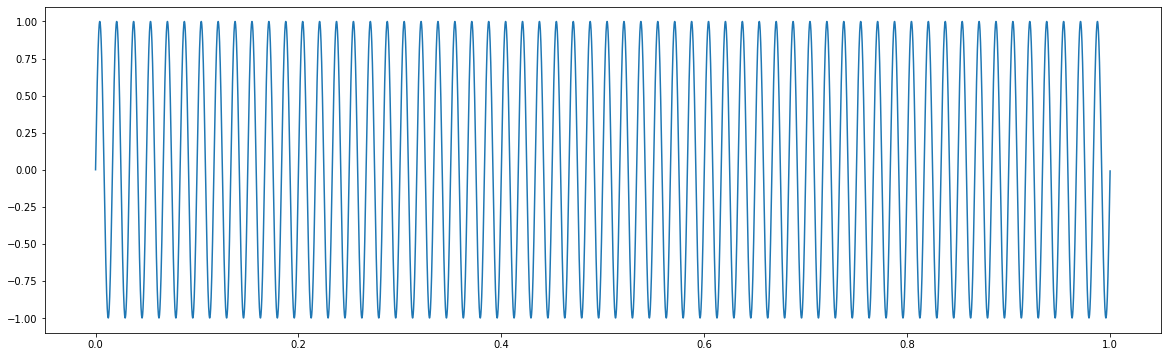

In [6]:
y_signal = create_sin(x, 60)
plt.plot(x, y_signal)
plt.show()

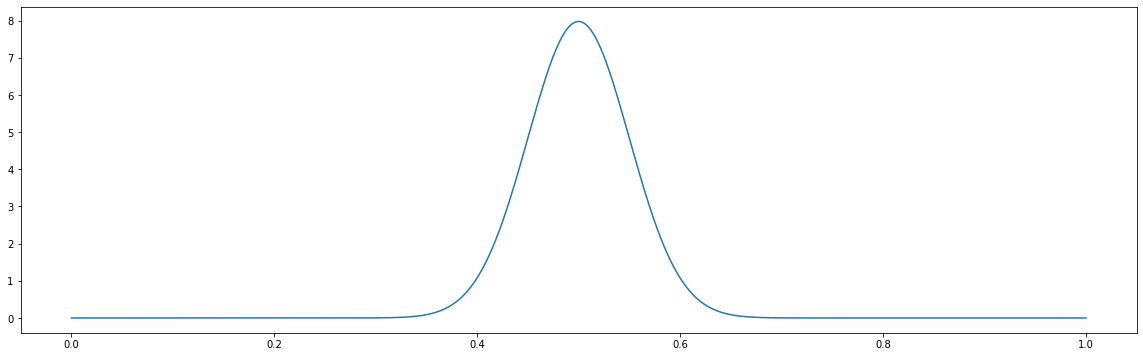

In [7]:
y = create_pdf(x, 0.5, 0.05)
plt.plot(x, y)
plt.show()

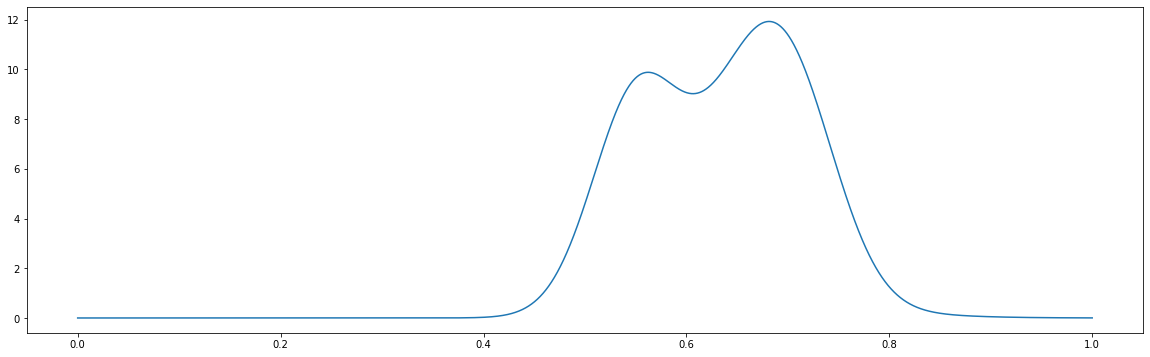

In [8]:
y = random_pdf(x) + random_pdf(x) + random_pdf(x) + random_pdf(x)
plt.plot(x, y)

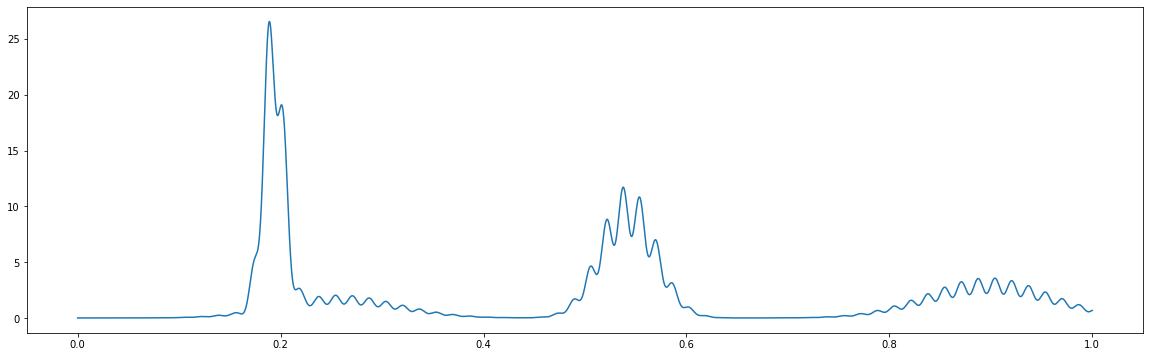

In [9]:
# create a random curve based of multiple pdf added together
y_increment = random_pdf(x) + random_pdf(x) + random_pdf(x) + random_pdf(x)
# plt.plot(x, y_increment)

# smoth the curve to use as factor for amplitude
max_factor = y_increment.max() / 5
y_factor = normalize(moving_avg(y_increment, 1000)) * max_factor
# plt.plot(x, y_factor)

final_signal = y_signal * y_factor + y_increment
plt.plot(x, final_signal)
plt.show()

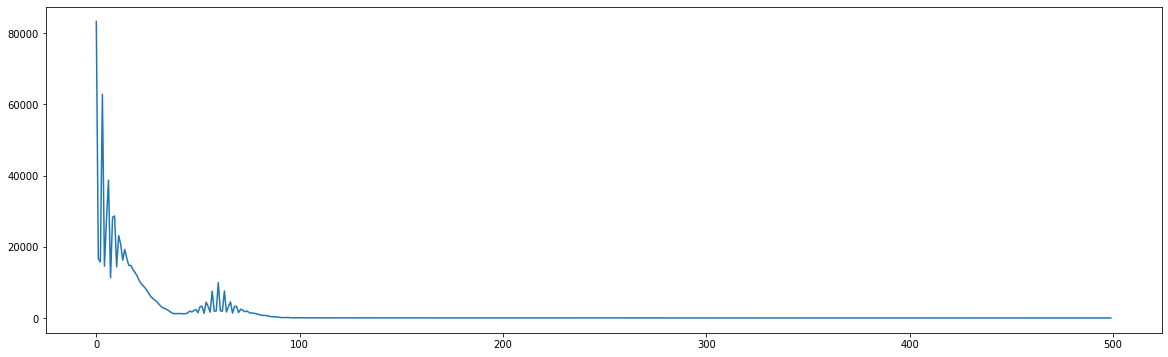

min: 37.63410266448249, max: 45.4126679429099, avg: 40.673269285933785


In [10]:
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(final_signal)
xf = fftfreq(N, 1 / SAMPLE_RATE)

from scipy.fft import rfft, rfftfreq

yf = rfft(final_signal)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf[:500], np.abs(yf)[:500])  # plotting for testing purposes only. Will not plot in POC
plt.show()

interest_range = np.abs(yf)[110:130]
print(f'min: {interest_range.min()}, max: {interest_range.max()}, avg: {interest_range.mean()}')
